# Read-me

- Up until the last notebook, our model looks good enough.
- However, due to experimentation, we will do a common treatment on unbalanced bases. We will compare our treated ensemble model with our untreated model.
- For this, we will use two techniques, SMOTE, which generates new instances from the nearest neighbor. And TomekLinks which removes instances that, in theory, could confuse the classification. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, average_precision_score, classification_report
from sklearn.model_selection import train_test_split
from lib.utils import *
import pickle

# Load data

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
X_train = np.load('data/input/X_train.npy')
y_train = np.load('data/input/y_train.npy')
X_test = np.load('data/input/X_test.npy')
y_test = np.load('data/input/y_test.npy')

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.10, random_state=42)

In [8]:
# Treat imbalance

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

def plot_tsne(X):

    pca = TSNE(n_components=2,verbose=1)

    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['p1', 'p2'])

    principalDf['label'] = y_train

    sns.scatterplot(data=principalDf,x='p1',y='p2',hue='label',alpha=0.3)

## SMOTETomek

- We plot tsne before and after treatment to observe how fraud class grows up.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7272 samples in 0.016s...
[t-SNE] Computed neighbors for 7272 samples in 0.613s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7272
[t-SNE] Computed conditional probabilities for sample 2000 / 7272
[t-SNE] Computed conditional probabilities for sample 3000 / 7272
[t-SNE] Computed conditional probabilities for sample 4000 / 7272
[t-SNE] Computed conditional probabilities for sample 5000 / 7272
[t-SNE] Computed conditional probabilities for sample 6000 / 7272
[t-SNE] Computed conditional probabilities for sample 7000 / 7272
[t-SNE] Computed conditional probabilities for sample 7272 / 7272
[t-SNE] Mean sigma: 0.194908
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.594467
[t-SNE] KL divergence after 1000 iterations: 0.872873


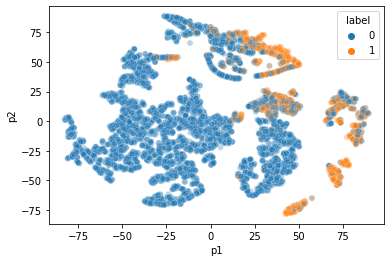

In [7]:
plot_tsne(X_train)

In [10]:
from imblearn.combine import SMOTETomek 
from collections import Counter
over_and_under_sample =  SMOTETomek(sampling_strategy = 1/2, n_jobs = -1, random_state = 42)
X_train, y_train = over_and_under_sample.fit_resample(X_train, y_train)

# checking under- and over-sample ratios between train and test set.
# DO NOT resample the test set!
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print(counter_train, counter_test)

Counter({0: 5963, 1: 2975}) Counter({0: 4779, 1: 637})


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8938 samples in 0.027s...
[t-SNE] Computed neighbors for 8938 samples in 0.834s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8938
[t-SNE] Computed conditional probabilities for sample 2000 / 8938
[t-SNE] Computed conditional probabilities for sample 3000 / 8938
[t-SNE] Computed conditional probabilities for sample 4000 / 8938
[t-SNE] Computed conditional probabilities for sample 5000 / 8938
[t-SNE] Computed conditional probabilities for sample 6000 / 8938
[t-SNE] Computed conditional probabilities for sample 7000 / 8938
[t-SNE] Computed conditional probabilities for sample 8000 / 8938
[t-SNE] Computed conditional probabilities for sample 8938 / 8938
[t-SNE] Mean sigma: 0.183193
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.554718
[t-SNE] KL divergence after 1000 iterations: 0.811139


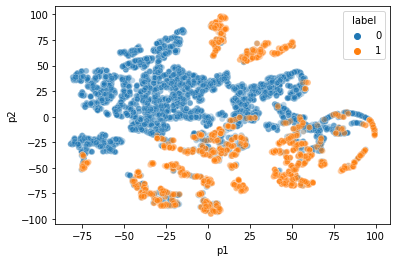

In [26]:
plot_tsne(X_train)

# Validate

In [27]:
from collections import Counter
Counter(y_train)

Counter({0: 5963, 1: 2975})

In [41]:
ensemble = joblib.load('data/models/ensemble.sav')

In [42]:
ensemble.fit(X_train,y_train)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(bagging_freq=1,
                                             class_weight='balanced',
                                             colsample_bytree=0.944578432980404,
                                             learning_rate=0.01909842850485622,
                                             max_depth=3, min_child_samples=12,
                                             n_estimators=528, num_leaves=8,
                                             random_state=0,
                                             subsample=0.6728679300083596)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                               

In [43]:
print_results_model(y_valid, ensemble, X_valid)

Classification report:
              precision    recall  f1-score   support

           0     0.9828    0.9168    0.9486       685
           1     0.6647    0.9113    0.7687       124

    accuracy                         0.9159       809
   macro avg     0.8237    0.9140    0.8587       809
weighted avg     0.9340    0.9159    0.9211       809

ROC AUC Score:
	 0.9649
Average precision-recall score:
	 0.6193


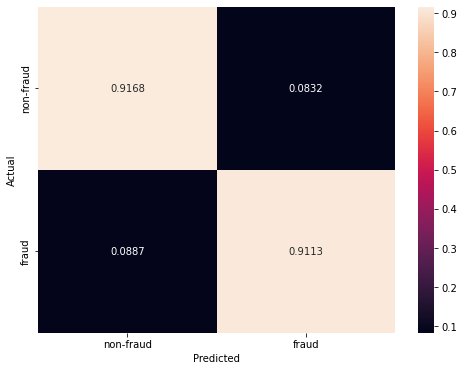

In [44]:
plot_confusion_matrix_model(y_valid, ensemble, X_valid)

In [32]:
ensemble = joblib.load('data/models/ensemble.sav')

In [33]:
ensemble.fit(X_train,y_train)

[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


VotingClassifier(estimators=[('lgbm',
                              LGBMClassifier(bagging_freq=1,
                                             class_weight='balanced',
                                             colsample_bytree=0.944578432980404,
                                             learning_rate=0.01909842850485622,
                                             max_depth=3, min_child_samples=12,
                                             n_estimators=528, num_leaves=8,
                                             random_state=0,
                                             subsample=0.6728679300083596)),
                             ('rf',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=20,
                                                     max_features='sqrt',
                                                     min_samples_leaf=4,
                                               

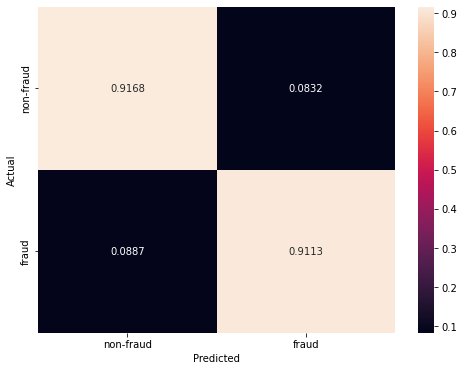

In [34]:
plot_confusion_matrix_model(y_valid, ensemble, X_valid)

In [24]:
print_results_model(y_valid, ensemble, X_valid)

Classification report:
              precision    recall  f1-score   support

           0     0.9828    0.9168    0.9486       685
           1     0.6647    0.9113    0.7687       124

    accuracy                         0.9159       809
   macro avg     0.8237    0.9140    0.8587       809
weighted avg     0.9340    0.9159    0.9211       809

ROC AUC Score:
	 0.9649
Average precision-recall score:
	 0.6193


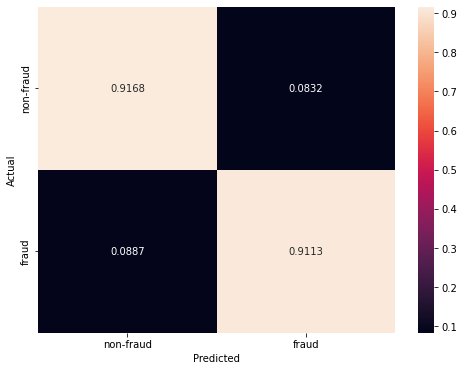

In [25]:
plot_confusion_matrix_model(y_valid, ensemble, X_valid)

# Generate Final Predictions

In [35]:
y_pred = ensemble.predict_proba(X_test)[:,1]

In [36]:
np.save("data/input/y_pred_ensemble.npy",y_pred)